In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
from itertools import combinations


In [100]:
train_data_path = "./data/train.csv"
test_data_path = "./data/test.csv"
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

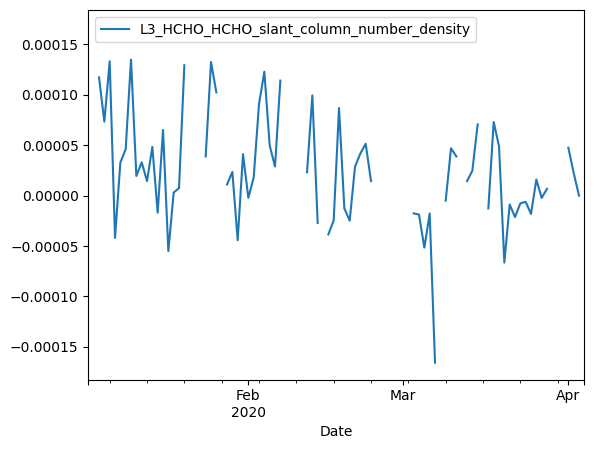

In [101]:
plot_data = test_data[test_data["Place_ID"]=="ZZDJZMS"][["Date","L3_HCHO_HCHO_slant_column_number_density"]]

plot_data["Date"] = pd.to_datetime(plot_data["Date"])
plot_data = plot_data.sort_values("Date")
plot_data.plot(x="Date", y="L3_HCHO_HCHO_slant_column_number_density")
plt.show()


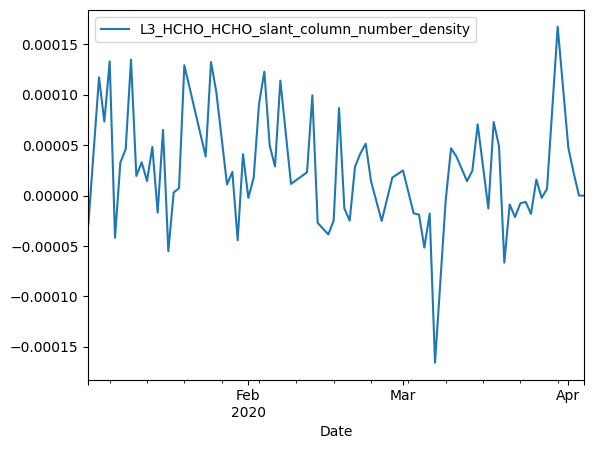

In [102]:
# after apply the interpolation
interpolated_data = test_data[test_data["Place_ID"]=="ZZDJZMS"][["Date","L3_HCHO_HCHO_slant_column_number_density"]]

interpolated_data["Date"] = pd.to_datetime(interpolated_data["Date"])

interpolated_data = interpolated_data.sort_values("Date")

interpolated_data = interpolated_data.interpolate()

interpolated_data.plot(x="Date", y="L3_HCHO_HCHO_slant_column_number_density")

plt.show()

In [132]:
test_data.groupby("Place_ID").count()

,Place_ID X Date,Date,precipitable_water_entire_atmosphere,relative_humidity_2m_above_ground,specific_humidity_2m_above_ground,temperature_2m_above_ground,u_component_of_wind_10m_above_ground,v_component_of_wind_10m_above_ground,L3_NO2_NO2_column_number_density,L3_NO2_NO2_slant_column_number_density,...,L3_SO2_sensor_zenith_angle,L3_SO2_solar_azimuth_angle,L3_SO2_solar_zenith_angle,L3_CH4_CH4_column_volume_mixing_ratio_dry_air,L3_CH4_aerosol_height,L3_CH4_aerosol_optical_depth,L3_CH4_sensor_azimuth_angle,L3_CH4_sensor_zenith_angle,L3_CH4_solar_azimuth_angle,L3_CH4_solar_zenith_angle
Place_ID,,,,,,,,,,,,,,,,,,,,,
0OS9LVX,94,94,94,94,94,94,94,94,94,94,...,91,91,91,29,29,29,29,29,29,29
0Q2LTOG,94,94,94,94,94,94,94,94,85,85,...,78,78,78,17,17,17,17,17,17,17
15WCXN1,94,94,94,94,94,94,94,94,91,91,...,79,79,79,12,12,12,12,12,12,12
19090SM,69,69,69,69,69,69,69,69,66,66,...,57,57,57,10,10,10,10,10,10,10
1BD5TVT,94,94,94,94,94,94,94,94,92,92,...,53,53,53,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YY9I2R1,94,94,94,94,94,94,94,94,94,94,...,80,80,80,12,12,12,12,12,12,12
YYOM5TU,94,94,94,94,94,94,94,94,92,92,...,62,62,62,11,11,11,11,11,11,11
Z2XYMS4,94,94,94,94,94,94,94,94,86,86,...,74,74,74,16,16,16,16,16,16,16


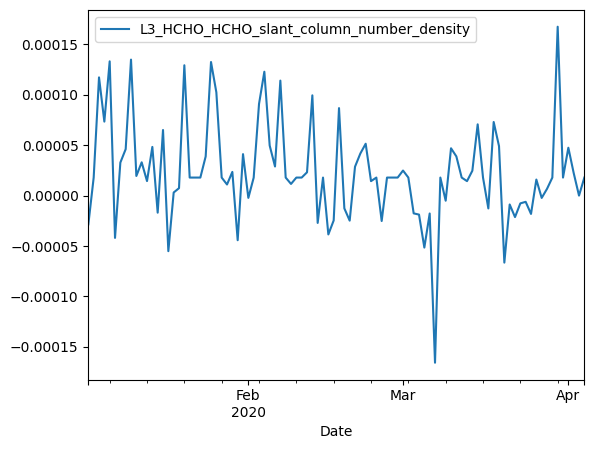

In [103]:
fill_median_data = test_data[test_data["Place_ID"] == "ZZDJZMS"][["Date", "L3_HCHO_HCHO_slant_column_number_density"]]

fill_median_data["Date"] = pd.to_datetime(fill_median_data["Date"])

fill_median_data = fill_median_data.sort_values("Date")

fill_median_data["L3_HCHO_HCHO_slant_column_number_density"] = fill_median_data["L3_HCHO_HCHO_slant_column_number_density"].fillna(fill_median_data["L3_HCHO_HCHO_slant_column_number_density"].median())

fill_median_data.plot(x="Date", y="L3_HCHO_HCHO_slant_column_number_density")

plt.show()

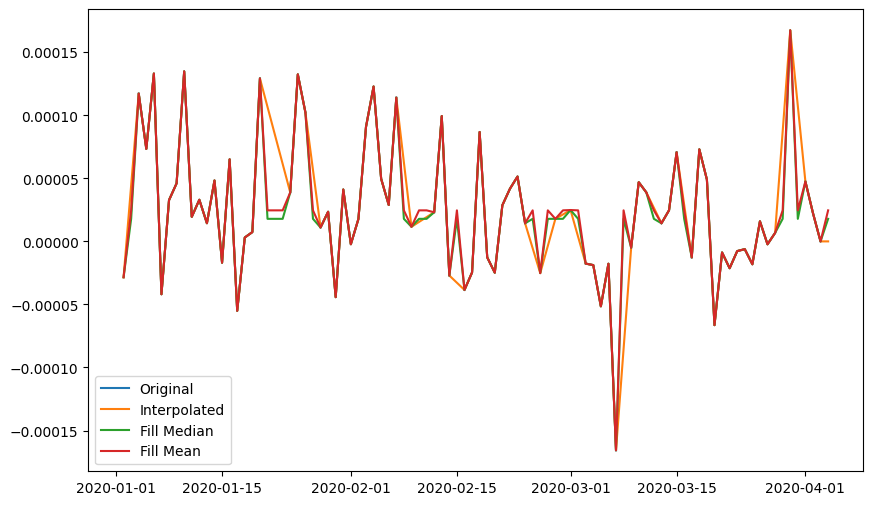

In [104]:
# fill the missing values with the mean value
mean_data = test_data[test_data["Place_ID"] == "ZZDJZMS"][["Date", "L3_HCHO_HCHO_slant_column_number_density"]]
mean_data["Date"] = pd.to_datetime(mean_data["Date"])
mean_data = mean_data.sort_values("Date")
mean_data["L3_HCHO_HCHO_slant_column_number_density"] = mean_data["L3_HCHO_HCHO_slant_column_number_density"].fillna(mean_data["L3_HCHO_HCHO_slant_column_number_density"].mean())

# compare the four methods


plt.figure(figsize=(10,6))
plt.plot(plot_data["Date"], plot_data["L3_HCHO_HCHO_slant_column_number_density"], label="Original")
plt.plot(interpolated_data["Date"], interpolated_data["L3_HCHO_HCHO_slant_column_number_density"], label="Interpolated")
plt.plot(fill_median_data["Date"], fill_median_data["L3_HCHO_HCHO_slant_column_number_density"], label="Fill Median")
plt.plot(mean_data["Date"], mean_data["L3_HCHO_HCHO_slant_column_number_density"], label="Fill Mean")
plt.legend()
plt.show()

In [105]:
# find the mean-square error
mse = mean_squared_error(fill_median_data["L3_HCHO_HCHO_slant_column_number_density"], interpolated_data["L3_HCHO_HCHO_slant_column_number_density"])

print("Mean Square Error: ", mse)

Mean Square Error:  4.909974260580231e-10


In [106]:
# spilt the column that start with "target"

target_train = train_data.filter(regex='target')
features_train = train_data.drop(columns=target_train.columns).drop(columns=["Date", "Place_ID X Date", "Place_ID"])

In [107]:
target_drop_na_train = target_train.dropna()
features_drop_na_train = features_train.dropna()

In [108]:
na_columns = features_train.isna().sum()
na_columns = na_columns[na_columns > 0]
na_columns

# group the number of missing values by the name of the column (e.g. start with "L3_NO2" or "L3_CH4")
print(na_columns.groupby(lambda x: x.split('_')[0] + "_" + x.split('_')[1]).median())
# s the number of missing values by the data of the column
print(na_columns.unique() )

L3_AER        197.0
L3_CH4      24765.0
L3_CLOUD     1522.0
L3_CO        5423.0
L3_HCHO      7425.0
L3_NO2       2190.0
L3_O3         283.0
L3_SO2       7237.0
dtype: float64
[ 2189  2190  8669   283  5423  7425  1522   374   197  7237  7308 24765]


In [109]:
# fill the missing values with the median of the column if the column is numerical, and drop the column if the column is categorical

def fill_missing_values(data):
    for column in data.columns:
        if data[column].dtype == np.float64 or data[column].dtype == np.int64:
            data[column].fillna(data[column].median(), inplace=True)
        else:
            data.drop(column, axis=1, inplace=True)
    return data

filled_train_data = fill_missing_values(features_train)

In [110]:
# fill the missing values using interpolation. Before that, we need to sort the data by the date column and group the data by the place_id column
features_train["Date"] = pd.to_datetime(train_data["Date"])
interpolated_train_data = train_data.sort_values(by="Date")
interpolated_train_data = interpolated_train_data.groupby("Place_ID").apply(lambda group: group.interpolate(method='linear', limit_direction='both', axis=0))
# interpolated_train_data = features_train.interpolate(method='linear', limit_direction='forward', axis=0)

C:\Users\yueny\AppData\Local\Temp\ipykernel_14512\3128513148.py:4: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  interpolated_train_data = interpolated_train_data.groupby("Place_ID").apply(lambda group: group.interpolate(method='linear', limit_direction='both', axis=0))
C:\Users\yueny\AppData\Local\Temp\ipykernel_14512\3128513148.py:4: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  interpolated_train_data = interpolated_train_data.groupby("Place_ID").apply(lambda group: group.interpolate(method='linear', limit_direction='both', axis=0))
C:\Users\yueny\AppData\Local\Temp\ipykernel_14512\3128513148.py:4: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False)

In [130]:
interpolated_train_data.dropna(inplace=True)
interpolated_train_data

MultiIndex([('010Q650',     0),
            ('010Q650',     1),
            ('010Q650',     2),
            ('010Q650',     3),
            ('010Q650',     4),
            ('010Q650',     5),
            ('010Q650',     6),
            ('010Q650',     7),
            ('010Q650',     8),
            ('010Q650',     9),
            ...
            ('YWSFY6Q', 30547),
            ('YWSFY6Q', 30548),
            ('YWSFY6Q', 30549),
            ('YWSFY6Q', 30550),
            ('YWSFY6Q', 30551),
            ('YWSFY6Q', 30552),
            ('YWSFY6Q', 30553),
            ('YWSFY6Q', 30554),
            ('YWSFY6Q', 30555),
            ('YWSFY6Q', 30556)],
           names=['Place_ID', None], length=30554)

In [112]:
# display(interpolated_train_data.mean())

In [123]:
def cal_percentage_error(data):
    error = (data.mean() - features_train.mean())/features_train.mean()*100
    return error.mean()

In [115]:
filled_train_data = features_train.fillna(features_train.median())

In [125]:

(filled_train_data.mean() - features_train.mean())


precipitable_water_entire_atmosphere                0.0
relative_humidity_2m_above_ground                   0.0
specific_humidity_2m_above_ground                   0.0
temperature_2m_above_ground                         0.0
u_component_of_wind_10m_above_ground                0.0
                                             ...       
L3_CH4_sensor_azimuth_angle                         0.0
L3_CH4_sensor_zenith_angle                          0.0
L3_CH4_solar_azimuth_angle                          0.0
L3_CH4_solar_zenith_angle                           0.0
Date                                    0 days 00:00:00
Length: 75, dtype: object

In [128]:
median_filled_error = cal_percentage_error(filled_train_data)

interpolated_error = cal_percentage_error(interpolated_train_data)

temp = features_drop_na_train.drop(["Place_ID X Date", "Date", "Place_ID"], axis=1)

drop_na_error = cal_percentage_error(temp)

print("Median filled error: ", median_filled_error)
print("Interpolated error: ", interpolated_error)
print("Drop NA error: ", drop_na_error.mean())

# variance of the three data sets
print("Median filled variance: ", filled_train_data.var().mean())
print("Interpolated variance: ", interpolated_train_data.var().mean())
print("Drop NA variance: ", temp.var().mean())

TypeError: unsupported operand type(s) for /: 'Timedelta' and 'Timestamp'

In [ ]:
# find the difference between using median filled and interpolated data

diff = filled_train_data - interpolated_train_data
print(diff.mean())


precipitable_water_entire_atmosphere    0.0
relative_humidity_2m_above_ground       0.0
specific_humidity_2m_above_ground       0.0
temperature_2m_above_ground             0.0
u_component_of_wind_10m_above_ground    0.0
                                       ... 
L3_CH4_aerosol_optical_depth            0.0
L3_CH4_sensor_azimuth_angle             0.0
L3_CH4_sensor_zenith_angle              0.0
L3_CH4_solar_azimuth_angle              0.0
L3_CH4_solar_zenith_angle               0.0
Length: 74, dtype: float64
